<a href="https://colab.research.google.com/github/anaisabelveg/tfm/blob/main/Regresion_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving transit_limpio.csv to transit_limpio.csv


In [3]:
dfTransit = pd.read_csv("transit_limpio.csv")
dfTransit.head(10)

,region,price,year,cylinders,fuel,odometer,title_status,transmission,drive,lat,long
0,birmingham,31900,2019.0,6,1,29497.0,1,1,1,36.464100,-86.658280
1,birmingham,32900,2019.0,6,1,6735.0,1,1,1,36.464100,-86.658280
2,birmingham,34500,2019.0,6,1,7646.0,1,1,1,36.464100,-86.658280
3,birmingham,32700,2019.0,6,1,13646.0,1,1,1,36.464100,-86.658280
4,birmingham,32900,2019.0,6,1,6735.0,1,1,1,36.464100,-86.658280
5,birmingham,34800,2019.0,6,1,31020.0,1,1,1,36.464100,-86.658280
6,birmingham,32800,2018.0,6,1,43479.0,1,1,1,36.464100,-86.658280
7,birmingham,38300,2020.0,6,1,7540.0,1,1,1,36.464100,-86.658280
8,birmingham,34800,2019.0,6,1,31020.0,1,1,1,36.464100,-86.658280
9,huntsville / decatur,14882,2015.0,6,1,151780.0,2,1,1,36.107596,-86.743824


In [4]:
from sklearn.model_selection import train_test_split

# convertimos el DataFrame al formato necesario para scikit-learn
data = dfTransit.values 

y = data[:, 1:2]     # nos quedamos con la 2ª columna, price
y=y.astype('int')
X = data[:, 2:9]      # nos quedamos con el resto

feature_names = dfTransit.columns[2:9]

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (287, 7)
Datos test:  (72, 7)


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

Niterations = [500, 1000, 1500, 2000]
learningRate = [0.1, 0.05]
# mantenemos max_depth estático: max_depth=3

n_folds = 5

param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}
clf = GradientBoostingRegressor(random_state=0, max_depth=3)
grid = GridSearchCV(clf, param_grid=param_grid, cv=n_folds)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.502
best parameters: {'learning_rate': 0.05, 'n_estimators': 500}


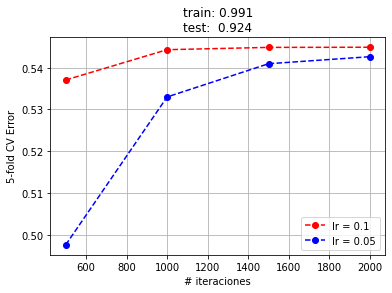

In [9]:
bt = GradientBoostingRegressor(random_state=0, max_depth=3, **grid.best_params_)
bt.fit(X_train, y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate), len(Niterations))
colors = ['r', 'b', 'g', 'k', 'm']
for i, lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o', label='lr = %g' % lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('{}-fold CV Error'.format(n_folds))
plt.title('train: %0.3f\ntest:  %0.3f' % (bt.score(X_train, y_train), bt.score(X_test, y_test)))
plt.grid()
plt.show()

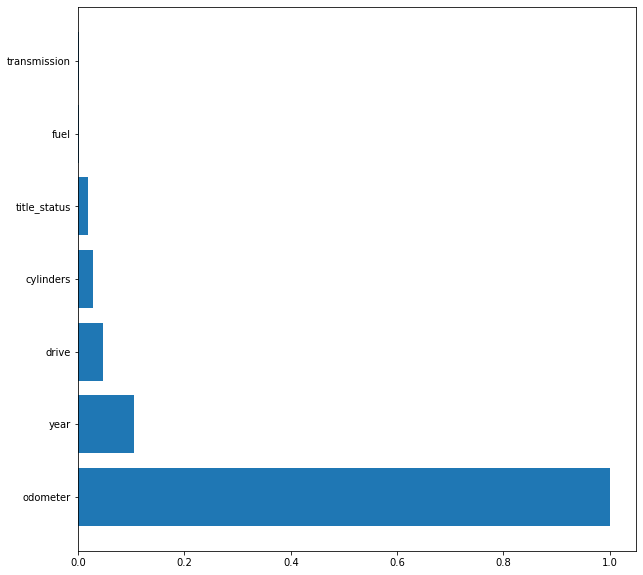

In [ ]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()